Nama: Adhi VIari Nugraha

username: adhi237

Email: viariadhi@gmail.com




In [ ]:
#unzipping dataset
!mkdir bbcnewsarchive
!unzip archive\ \(8\).zip -d bbcnewsarchive
!ls bbcnewsarchive

Archive:  archive (8).zip
  inflating: bbcnewsarchive/bbc-news-data.csv  
bbc-news-data.csv


Memasukan Dataset

In [ ]:
#import pandas
import pandas as pd

df = pd.read_csv('bbcnewsarchive/bbc-news-data.csv', sep='\t')
df.head(5)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
#data total
df.shape

(2225, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [ ]:
#melihat value per categories
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
#menghilangkan kolom yang tidak digunakan
df_baru = df.drop(columns=['filename'])
df_baru

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


Membersihkan Data

In [ ]:
#importing
import tensorflow as tf

In [ ]:
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#membuat semua karakter pada data menjadi lowercase
df_baru.title = df_baru.title.apply(lambda x: x.lower())
df_baru.content = df_baru.content.apply(lambda x: x.lower())

#menghilangkan punctuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_baru.title = df_baru.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(X))

#lemmatization
lemmatizer = WordNetLemmatizer

def lem(data):
  pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ,'R': wn.ADV}
  return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
  df_baru.title = df_baru.title.apply(lambda x: lem(x))
  df_baru.content = df_baru.content.apply(lambda x: lem(x))

#menghilangkan number
def rem_numbers(data):
  return re.sub('[0-9]+','',data)
  df_baru['title'].apply(rem_numbers)
  df_baru['content'].apply(rem_numbers)

#menghilangkan stopword
st_words = stopwords.words()
def stopword(data):
  return(' '.join([w for w in data.split() if w not in st_words ]))
  df_baru.title = df_new.title.apply(lambda x: stopword(X))
  df_baru.content = df_baru.content.apply(lambda x: lem(x))

In [ ]:
df_baru.head(5)

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


Membuat Model

In [ ]:
#one hot encoding data category
category = pd.get_dummies(df_baru.category)
df_baru_cat = pd.concat([df_baru, category], axis=1)
df_baru_cat = df_baru_cat.drop(columns='category')
df_baru_cat.head(30)

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
5,japan narrowly escapes recession,japan's economy teetered on the brink of a te...,1,0,0,0,0
6,jobs growth still slow in the us,the us created fewer jobs than expected in ja...,1,0,0,0,0
7,india calls for fair trade rules,"india, which attends the g7 meeting of seven ...",1,0,0,0,0
8,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,court rejects $280bn tobacco case,a us government claim accusing the country's ...,1,0,0,0,0


In [ ]:
#mengubah df value menjadi array
news = df_baru_cat['title'].values + '' + df_baru_cat['content'].values
label = df_baru_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
news

array(['ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sig

In [ ]:
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split
news_train, news_val, label_train, label_val = train_test_split(news, label, test_size =0.2, shuffle=True) #test_size 0.2 karena kriteria yang dibutuhkan adalah val sebesar 20%

In [ ]:
#tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_val)

sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_val = tokenizer.texts_to_sequences(news_val)

padded_train = pad_sequences(sekuens_train)
padded_val = pad_sequences(sekuens_val)

In [ ]:
#model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nAccuracy dari training set dan validation set sudah >90%!")
callbacks = myCallback()

In [ ]:
#fit
history = model.fit(padded_train, label_train, epochs=50, validation_data=(padded_val, label_val), verbose = 2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 20s - loss: 1.6067 - accuracy: 0.2579 - val_loss: 1.4644 - val_accuracy: 0.3820
Epoch 2/50
56/56 - 12s - loss: 1.6723 - accuracy: 0.4146 - val_loss: 1.1805 - val_accuracy: 0.5191
Epoch 3/50
56/56 - 11s - loss: 0.8899 - accuracy: 0.6624 - val_loss: 0.5494 - val_accuracy: 0.7865
Epoch 4/50
56/56 - 11s - loss: 0.4442 - accuracy: 0.8174 - val_loss: 0.6616 - val_accuracy: 0.7371
Epoch 5/50
56/56 - 11s - loss: 0.2693 - accuracy: 0.9140 - val_loss: 0.4540 - val_accuracy: 0.8382
Epoch 6/50
56/56 - 11s - loss: 0.0780 - accuracy: 0.9787 - val_loss: 0.4676 - val_accuracy: 0.8764
Epoch 7/50
56/56 - 12s - loss: 0.0711 - accuracy: 0.9843 - val_loss: 0.4767 - val_accuracy: 0.8742
Epoch 8/50
56/56 - 12s - loss: 0.0511 - accuracy: 0.9876 - val_loss: 0.6406 - val_accuracy: 0.7955
Epoch 9/50
56/56 - 11s - loss: 0.0912 - accuracy: 0.9792 - val_loss: 0.5959 - val_accuracy: 0.8202
Epoch 10/50
56/56 - 11s - loss: 0.0227 - accuracy: 0.9966 - val_loss: 0.5621 - val_accuracy: 0.8652
Epoch 11/

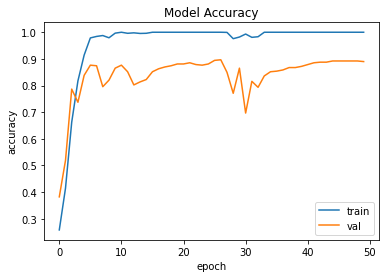

In [ ]:
#plotting the accuration of model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show()

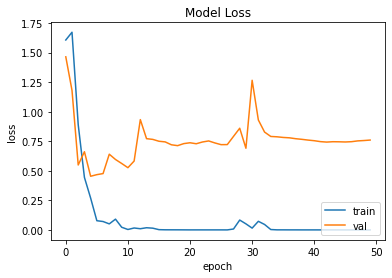

In [ ]:
# plotting the loss of model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()